# Number of Rectangle in $n$x$n$ grid
<i>Find the number of rectangles in a nxn grid</i>

### 1) Importing libraries in Python

In [1]:
# Given a set of points arranged in a nxn configuration,
# determine the number of rectangles that can be formed !!!
import numpy as np
import matplotlib.pyplot as plt

### 2) Input the grid size

In [2]:
n = input("Enter the dimension of your grid: ")
n = int(n)

Enter the dimension of your grid:  5


### 3) Setting coordinates

In [3]:
# The coordinates of the possible Corners
X = [i for i in range(1,n+1)]
Y = [i for i in range(1,n+1)]
Points = [(i,j) for i in X for j in Y ]

# The coordinates of the intersection of the possible Diagonals
Dx = [i/2 for i in range(3,n*2)]
Dy = [i/2 for i in range(3,n*2)]
Mid_Diag = [(i,j) for i in Dx for j in Dy ]

### 4) Helping Functions

In [4]:
def find_opposite_corner(A,M):
    Rx = 2*M[0] - A[0]
    Ry = 2*M[1] - A[1]
    return( (Rx,Ry) )

def corner_is_valid(B):
    return(B in Points)

def line_length(A,B):
    rx = (A[0]-B[0])**2
    ry = (A[1]-B[1])**2
    R = np.sqrt(rx+ry)
    return(R)

def points_order(A,M,B):
    if A[0] < B[0]:
        R = (A[0],A[1],M[0],M[1],B[0],B[1])
    elif A[0] == B[0]:
        if A[1] < B[1]:
            R = (A[0],A[1],M[0],M[1],B[0],B[1])
        elif B[1] < A[1]:
            R = (B[0], B[1], M[0], M[1], A[0], A[1])
    elif B[0] < A[0]:
        R = (B[0], B[1], M[0], M[1], A[0], A[1])
    return(R)

### 5) preparing Variables and Grid

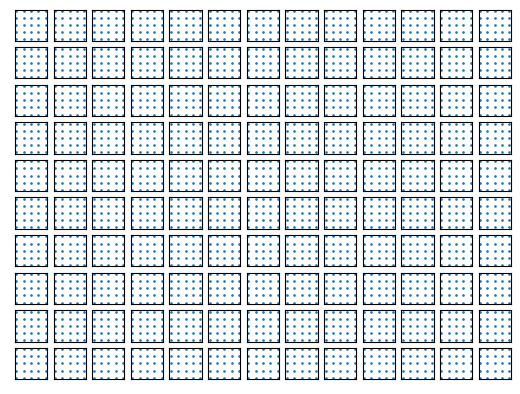

In [5]:
# Number of Rectangles
Num = 0
Puntos = Points[:]         # update by removing 4 Corners each time a rectangle is found
Already = []

fig, axes = plt.subplots(10,13)

xx = [i[0] for i in Points]
yy = [i[1] for i in Points]
for i in range(0,10):
    for k in range(0,13):
        axes[i,k].scatter(xx,yy, s=0.8)
        # axes[i, k].axis('off')
        axes[i, k].set_xticks([])
        axes[i, k].set_yticks([])

### 6) searching Loop

El Numero de Rectangulos para una Malla de 5 x 5  es : 130


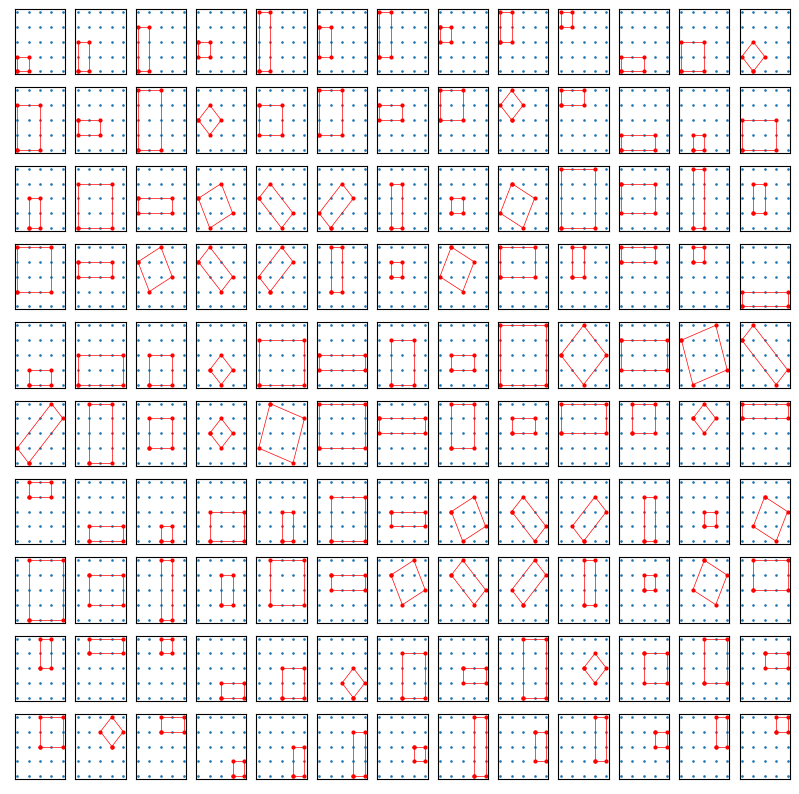

In [10]:
# Number of Rectangles
Num = 0
Puntos = Points[:]         # update by removing 4 Corners each time a rectangle is found
Already = []

fig, axes = plt.subplots(10,13)
plt.rcParams['figure.figsize'] = [10,10]

xx = [i[0] for i in Points]
yy = [i[1] for i in Points]
for i in range(0,10):
    for k in range(0,13):
        axes[i,k].scatter(xx,yy, s=0.8)
        # axes[i, k].axis('off')
        axes[i, k].set_xticks([])
        axes[i, k].set_yticks([])


for M in Mid_Diag:
    #Already.clear()
    for C1 in Puntos:
        C2 = find_opposite_corner(C1,M)
        if corner_is_valid(C2) and M != C1:  # M != C1 is to take into account when center point can also be a Corner
            Puntos.remove(C1)
            Puntos.remove(C2)
            for C3 in Puntos:
                if line_length(M,C3) == line_length(M,C1) and points_order(C1,M,C3) not in Already:
                    C4 = find_opposite_corner(C3,M)
                    if corner_is_valid(C4):
                        Puntos.remove(C3)
                        Puntos.remove(C4)
                        Num+=1           # a Rectangle has been found
                        Already.append(points_order(C1,M,C3))
                        Already.append(points_order(C2,M,C3))
                        Already.append(points_order(C1,M,C4))
                        Already.append(points_order(C2,M,C4)) # We record the rectangle formed
                                                              # so that we don't repeat it later

                        xp = [C1[0], C3[0], C2[0], C4[0], C1[0]]
                        yp = [C1[1], C3[1], C2[1], C4[1], C1[1]]
                        axes[ int((Num-1)/13) , (Num-1)%13 ].scatter(xp,yp,c='red', s=0.8)
                        axes[ int((Num-1)/13) , (Num-1)%13 ].plot(xp,yp,'ro-' , markersize=2, linewidth=0.5)
                        #axes[ int((Num-1)/13) , (Num-1)%13 ].set_title( '(' + str(M[0]) + ',' + str(M[1]) + ')' )

            #Already.append( (C1[0],C1[1],M[0],M[1],C3[0],C3[1]) )
            Puntos = Points[:]           # reset the list of possible Corners

print('El Numero de Rectangulos para una Malla de',n,'x',n,' es :', Num)
plt.show()